In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [152]:
df = pd.read_csv('diamonds.csv')
df = df.drop(columns = df.columns[0])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Data Desctiption
- Data contains all information regarding pieces of diamonds
- Some of the features might not contribute to the price of the piece of diamond we will need to find the most important features
- Our target is to train a model that can predict the price of a piece of diamond given the important features

In [153]:
print(df['carat'].min())
print(df['carat'].max())

0.2
5.01


In [154]:
print(df['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [155]:
print(df['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [156]:
print(df['clarity'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [157]:
print(df['depth'].min())
print(df['depth'].max())

43.0
79.0


In [158]:
print(df['table'].min())
print(df['table'].max())

43.0
95.0


In [159]:
print(df['price'].min())
print(df['price'].max())

326
18823


In [160]:
ordinal_features = ['cut', 'color', 'clarity']
cut_category_order = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
color_category_order = ['E', 'I', 'J', 'H', 'F', 'G', 'D']
clarity_category_order = ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

encoder = OrdinalEncoder(categories=[cut_category_order, color_category_order, clarity_category_order])
encoder

OrdinalEncoder(categories=[['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],
                           ['E', 'I', 'J', 'H', 'F', 'G', 'D'],
                           ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1',
                            'IF']])

In [161]:
df[['cut', 'color', 'clarity']] = encoder.fit_transform(df[ordinal_features])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0.0,0.0,0.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1.0,0.0,1.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2.0,0.0,2.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2.0,2.0,0.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0.0,6.0,1.0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2.0,6.0,1.0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3.0,6.0,1.0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1.0,3.0,0.0,61.0,58.0,2757,6.15,6.12,3.74


In [162]:
corr_mat = df.corr()

<Axes: >

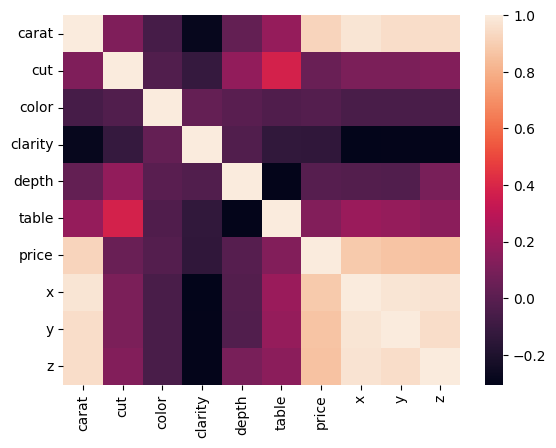

In [163]:
sns.heatmap(corr_mat)

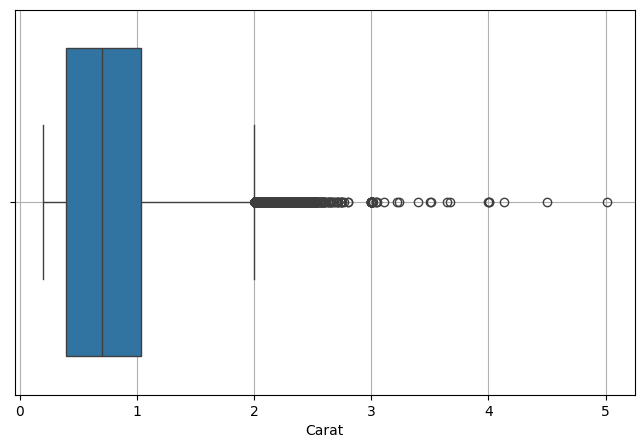

In [164]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['carat'])
plt.xlabel('Carat')
plt.grid(True)
plt.show()

In [165]:
missing_values_boolean = df.isnull().sum().sum()
print(missing_values_boolean)

0


In [166]:
x = df.drop(['cut', 'color', 'price', 'table', 'depth', 'clarity'], axis = 1)
y = df['price']

# First we will try Linear Regression model

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

R2 = 0.8543165566039279
MSE = 2315903.688072045
RMSE = 1521.809346821094


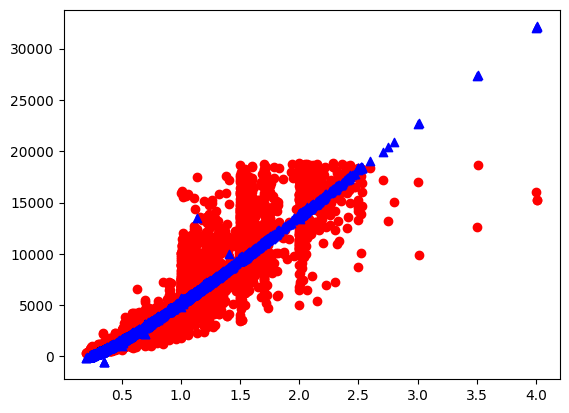

In [168]:
x_p = x_test.drop(['x', 'y', 'z'], axis = 1)
plt.scatter(x_p, y_test, color='red', marker='o', label='Type A')
plt.scatter(x_p, y_pred, color='blue', marker='^', label='Type B')

# Let's try taking only one feature of the 4 features

In [169]:
x = df.drop(['cut', 'color', 'price', 'table', 'depth', 'clarity', 'x', 'y', 'z'], axis = 1)
y = df['price']

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

n = len(y)
p = x.shape[1]
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"R2 = {r2}")
print(f"R2_Adjusted = {adjusted_r_squared}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

R2 = 0.8489390686155807
R2_Adjusted = 0.8489362679753756
MSE = 2401388.6544790952
RMSE = 1549.6414599768216


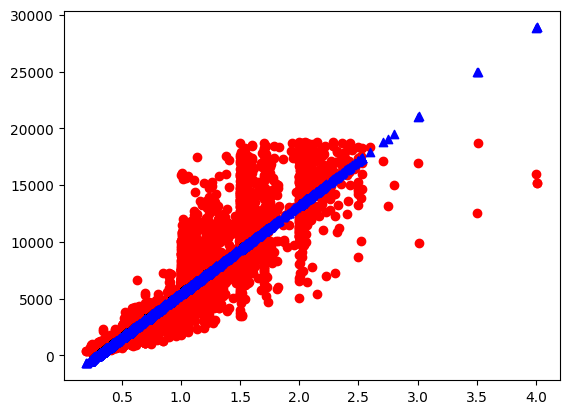

In [171]:
x_p = x_test
plt.scatter(x_p, y_test, color='red', marker='o', label='Type A')
plt.scatter(x_p, y_pred, color='blue', marker='^', label='Type B')

# Lasso

In [172]:
x = df.drop(['cut', 'color', 'price', 'table', 'depth', 'clarity'], axis = 1)
y = df['price']

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

n = len(y)
p = x.shape[1]
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"R2 = {r2}")
print(f"R2_Adjusted = {adjusted_r_squared}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

R2 = 0.8543071398240127
R2_Adjusted = 0.8542963347541934
MSE = 2316053.384941003
RMSE = 1521.858529870961


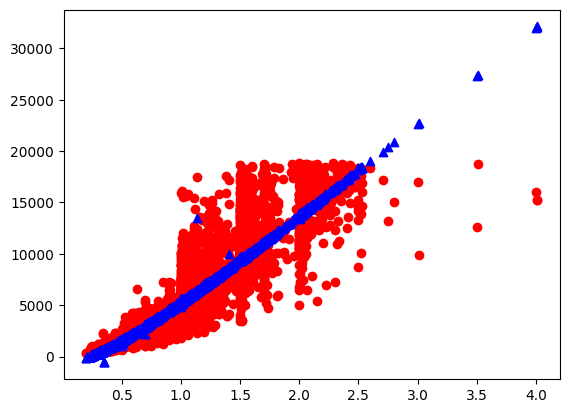

In [174]:
x_p = x_test.drop(['x', 'y', 'z'], axis = 1)
plt.scatter(x_p, y_test, color='red', marker='o', label='Type A')
plt.scatter(x_p, y_pred, color='blue', marker='^', label='Type B')

# Ridge

In [175]:
x = df.drop(['cut', 'color', 'price', 'table', 'depth', 'clarity'], axis = 1)
y = df['price']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

n = len(y)
p = x.shape[1]
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"R2 = {r2}")
print(f"R2_Adjusted = {adjusted_r_squared}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

R2 = 0.8543161351547419
R2_Adjusted = 0.8543053307520464
MSE = 2315910.387774506
RMSE = 1521.811548048741


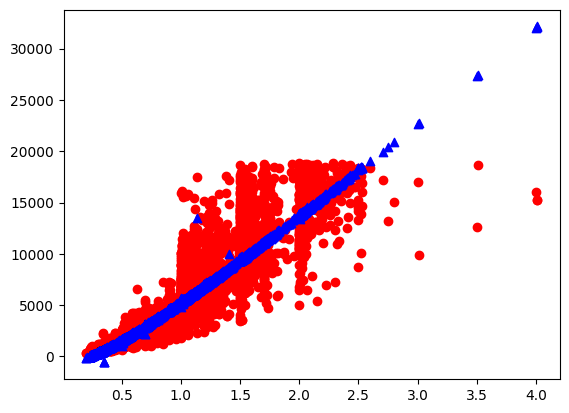

In [177]:
x_p = x_test.drop(['x', 'y', 'z'], axis = 1)
plt.scatter(x_p, y_test, color='red', marker='o', label='Type A')
plt.scatter(x_p, y_pred, color='blue', marker='^', label='Type B')

# Elastic Net

In [178]:
x = df.drop(['cut', 'color', 'price', 'table', 'depth', 'clarity'], axis = 1)
y = df['price']

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
elastic_net = ElasticNet(alpha = 0.1)
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_test)

n = len(y)
p = x.shape[1]
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"R2 = {r2}")
print(f"R2_Adjusted = {adjusted_r_squared}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

R2 = 0.811824738985505
R2_Adjusted = 0.8118107832787458
MSE = 2991388.525891602
RMSE = 1729.5631026047017


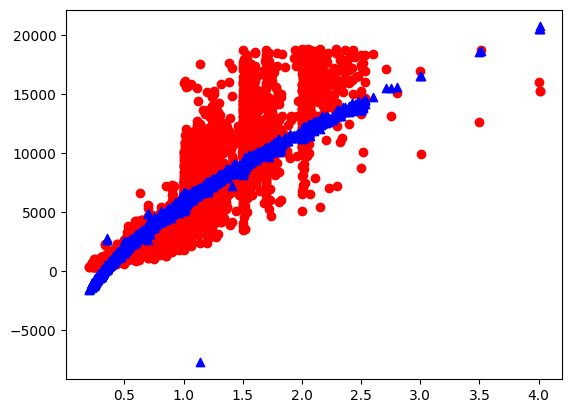

In [180]:
x_p = x_test.drop(['x', 'y', 'z'], axis = 1)
plt.scatter(x_p, y_test, color='red', marker='o', label='Type A')
plt.scatter(x_p, y_pred, color='blue', marker='^', label='Type B')

# Conclusion
- All models achieved similar results except for the Elastic-Net
- However we can see that Ridge and Lasso models are the most accurate due to their ability of handling multicollinearity